# Timeseries extraction
This notebook is used for timeseries extraction of the previously denoised fMRI dataset obtained from OpenNeuro database: *Neural correlates of the LSD experience revealed by multimodal neuroimaging* [(link to dataset)](https://openneuro.org/datasets/ds003059/versions/1.0.0). 
Timeseries extraction is performed for data:
1) with global singnal
2) with regression of the global signal

Brain atlas: Schaefer 2018., 400 ROIs, 2mm resolution [(atlas Github repository)](https://github.com/ThomasYeoLab/CBIG/tree/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal)

**Last update:** 07.07.2021

### Step 0: Loading libraries

In [1]:
%matplotlib inline

import numpy as np
from nilearn import input_data, plotting, datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.plotting import plot_roi
from nilearn.image import clean_img

### Step 1: Creating parcellation ###

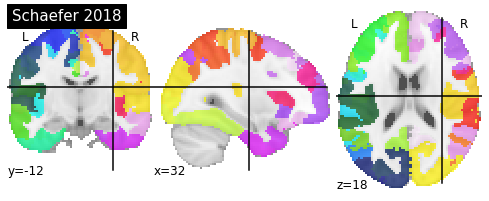

In [2]:
#Loading atlas
atlas_path = '/home/iga/BrainStates/brain-states/Analysis/atlas/schaefer_2018/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'

#Creating parcellation
schaefer_atlas = input_data.NiftiLabelsMasker(atlas_path)
parcellation = np.asarray([schaefer_atlas, "Schaefer_2018", 400])

#Plotting atlas
plotting.plot_roi(atlas_path, title = 'Schaefer 2018')

### Step 2: Selecting denoised data

In [3]:
#Input path
data_path = '/home/iga/BrainStates/ds003059/data/standardized'
subjects = ['001','002', '003', '004','006','009','010','011', '012', '013', '015', '017','018','019','020']
sub_del = ['003', '012', '015']
sessions = ['LSD','PLCB']
task = 'rest'
runs = ['01','02','03']
suffix = 'nii.gz'

#Output path
output = '/home/iga/BrainStates/ds003059/'

### Step 3: Creating matrices

In [4]:
n_subjects = len(subjects)
n_runs = len(runs)
n_rois = parcellation[2]
timeseries_len = 217

#Creating empty matrices to store the data
timeseries_plcb = np.zeros((n_subjects, n_runs, n_rois, timeseries_len))
timeseries_lsd = np.zeros((n_subjects,  n_runs, n_rois, timeseries_len))

### Step 4: Extracting timeseries with global signal ###

In [5]:
#Iterationg over sessions
for ses in sessions:
    
    #Iterating over subjects
    for i, sub in enumerate(subjects):
        
        #Iterating over runs
        for k, run in enumerate(runs):
                
            print(f'Extracting timeseries from subject {sub} session {ses} run {run}')
            
            #Selecting denoised data
            subject_path = f'{data_path}/'
            file = f'standardized_sub-{sub}_ses-{ses}_task-{task}_run-{run}_bold.{suffix}'
            file_path = f'{subject_path}{file}'

            #Signal extraction
            timeseries = parcellation[0].fit_transform(file_path, confounds=None).T
            
            if ses == 'PLCB':
                timeseries_plcb[i,k,:,:] = timeseries
            else:
                timeseries_lsd[i,k,:,:] = timeseries
                
                    
    print(f'Saving timeseries from session {ses}')
   
    #Creating a dictionary including both timeseries
    timeseries_all = {'sessions': {'PLCB': {'timeseries': timeseries_plcb}, 'LSD': {'timeseries': timeseries_lsd}}}
    
    #Saving the data
    np.save(f'{output}/{parcellation[1]}_standardized_timeseries.npy', timeseries_all)

Extracting timeseries from subject 001 session LSD run 01
Extracting timeseries from subject 001 session LSD run 02
Extracting timeseries from subject 001 session LSD run 03
Extracting timeseries from subject 002 session LSD run 01
Extracting timeseries from subject 002 session LSD run 02
Extracting timeseries from subject 002 session LSD run 03
Extracting timeseries from subject 003 session LSD run 01
Extracting timeseries from subject 003 session LSD run 02
Extracting timeseries from subject 003 session LSD run 03
Extracting timeseries from subject 004 session LSD run 01
Extracting timeseries from subject 004 session LSD run 02
Extracting timeseries from subject 004 session LSD run 03
Extracting timeseries from subject 006 session LSD run 01
Extracting timeseries from subject 006 session LSD run 02
Extracting timeseries from subject 006 session LSD run 03
Extracting timeseries from subject 009 session LSD run 01
Extracting timeseries from subject 009 session LSD run 02
Extracting tim

## Step 5: Extracting timeseries without global signal ##

In [6]:
#Iterationg over sessions
for ses in sessions:
    
    #Iterating over subjects
    for i, sub in enumerate(subjects):
        
        #Iterating over runs
        for k, run in enumerate(runs):
                
            print(f'Extracting timeseries from subject {sub} session {ses} run {run}')
            
             #Selecting denoised data
            subject_path = f'{data_path}/'
            file = f'standardized_sub-{sub}_ses-{ses}_task-{task}_run-{run}_bold.{suffix}'
            file_path = f'{subject_path}{file}'

            #Signal extraction
            timeseries = parcellation[0].fit_transform(file_path, confounds=None).T
            
            #Calculating global signal 
            global_signal = np.mean(timeseries, axis = 0)
            
            #Regression of the global signal
            data_cleaned = clean_img(file_path, confounds = global_signal, detrend=True)
            timeseries_cleaned = parcellation[0].fit_transform(data_cleaned, confounds=None).T
            
            if ses == 'PLCB':
                timeseries_plcb[i,k,:,:] = timeseries_cleaned
            else:
                timeseries_lsd[i,k,:,:] = timeseries_cleaned
                    
                
    print(f'Saving timeseries from session {ses}')
   
    #Creating a dictionary including both timeseries
    timeseries_all = {'sessions': {'PLCB': {'timeseries': timeseries_plcb}, 'LSD': {'timeseries': timeseries_lsd}}}
    
    #Saving the data
    np.save(f'{output}/{parcellation[1]}_cleaned_standardized_timeseries.npy', timeseries_all)

Extracting timeseries from subject 001 session LSD run 01
Extracting timeseries from subject 001 session LSD run 02
Extracting timeseries from subject 001 session LSD run 03
Extracting timeseries from subject 002 session LSD run 01
Extracting timeseries from subject 002 session LSD run 02
Extracting timeseries from subject 002 session LSD run 03
Extracting timeseries from subject 003 session LSD run 01
Extracting timeseries from subject 003 session LSD run 02
Extracting timeseries from subject 003 session LSD run 03
Extracting timeseries from subject 004 session LSD run 01
Extracting timeseries from subject 004 session LSD run 02
Extracting timeseries from subject 004 session LSD run 03
Extracting timeseries from subject 006 session LSD run 01
Extracting timeseries from subject 006 session LSD run 02
Extracting timeseries from subject 006 session LSD run 03
Extracting timeseries from subject 009 session LSD run 01
Extracting timeseries from subject 009 session LSD run 02
Extracting tim